In [140]:
import pandas as pd
import math
import sklearn
from sklearn import preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [141]:
data=pd.read_csv("D://Projects//New York Stock Market Prediction//DataSets//prices-split-adjusted.csv", index_col = 0)  #Read Data From the CSV File
data.head()

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


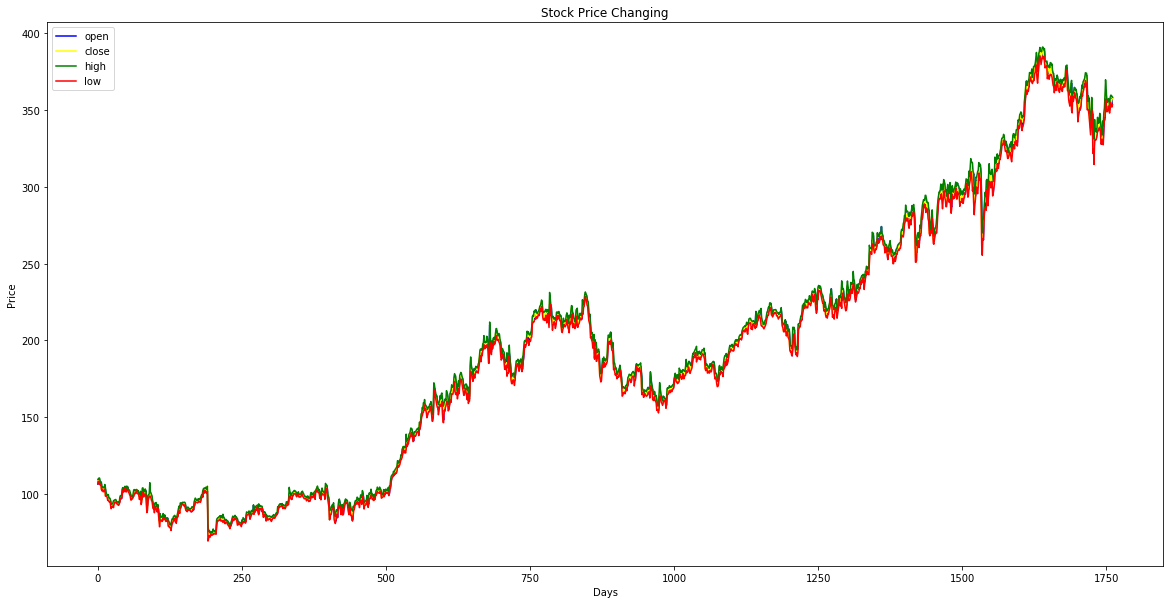

In [142]:
# Plot to view how Open, Close high and low stock prices changing with the time
plt.figure(figsize=(20,10));
plt.plot(data[data.symbol == 'EQIX'].open.values, color='blue', label='open')            #Add Open Stock Prices to plolt
plt.plot(data[data.symbol == 'EQIX'].close.values, color='yellow', label='close')        #Add Close stock Prices to plot
plt.plot(data[data.symbol == 'EQIX'].high.values, color='green', label='high')           #Add highest stock values of the each day
plt.plot(data[data.symbol == 'EQIX'].low.values, color='red', label='low')               #Add lowest stock values of the each day
plt.title('Stock Price Changing')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

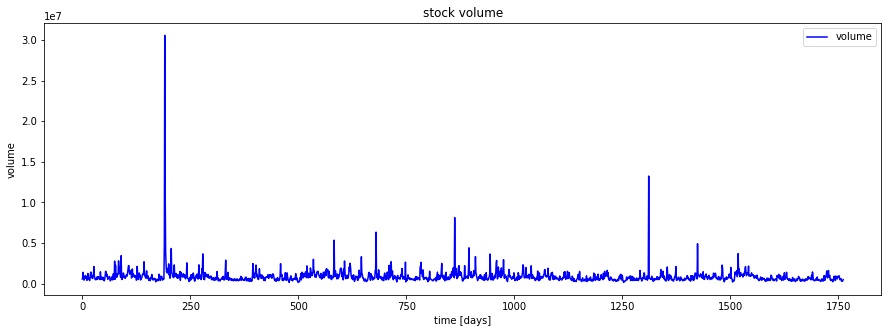

In [143]:
# Plot to View how the Stock volume changing with the time
plt.figure(figsize=(15,5));  
plt.plot(data[data.symbol == 'EQIX'].volume.values, color='blue', label='volume')  #Add volume data to plot
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best')

In [144]:
# Get number of companies availabe in the data set
code = list(set(data.symbol))
len(code)

501

In [145]:
code[:502]  #Display symbols of each companies

['AVY',
 'AVB',
 'ADS',
 'CRM',
 'HCN',
 'PH',
 'CAT',
 'BA',
 'DHI',
 'EQIX',
 'K',
 'NWL',
 'PKI',
 'DRI',
 'BLL',
 'MSI',
 'PYPL',
 'PPL',
 'TDC',
 'BSX',
 'JEC',
 'VRSN',
 'CCL',
 'NFX',
 'WBA',
 'ALLE',
 'NAVI',
 'CERN',
 'COO',
 'TDG',
 'RCL',
 'PEP',
 'AWK',
 'AGN',
 'KR',
 'NSC',
 'NKE',
 'PG',
 'OKE',
 'UNH',
 'WY',
 'OXY',
 'PRGO',
 'WYN',
 'EIX',
 'HCA',
 'JCI',
 'TXT',
 'CHRW',
 'MSFT',
 'XRAY',
 'MNK',
 'LUV',
 'NRG',
 'TGNA',
 'DNB',
 'STT',
 'ZBH',
 'AAL',
 'EFX',
 'JBHT',
 'LB',
 'SYY',
 'KMX',
 'BBY',
 'BCR',
 'DE',
 'HPQ',
 'APA',
 'ACN',
 'UNM',
 'LRCX',
 'HSY',
 'DPS',
 'BAX',
 'FIS',
 'APH',
 'KORS',
 'COF',
 'ABBV',
 'FSLR',
 'SWK',
 'CI',
 'ZION',
 'GM',
 'CB',
 'AFL',
 'IFF',
 'BWA',
 'HOLX',
 'AXP',
 'SRE',
 'AAPL',
 'NTRS',
 'DAL',
 'SYF',
 'KSS',
 'PLD',
 'PFE',
 'NTAP',
 'UPS',
 'FBHS',
 'ABC',
 'BIIB',
 'LKQ',
 'QCOM',
 'TSO',
 'MDLZ',
 'FLS',
 'TROW',
 'CHD',
 'VZ',
 'DISCK',
 'AMG',
 'XOM',
 'DOW',
 'M',
 'DD',
 'EW',
 'EXPD',
 'RAI',
 'FTI',
 'WU',
 'RF'

In [146]:
# Move close column to last
data["closed"] = data.close 
data.drop(['close'], 1, inplace=True) 
data.head()

,symbol,open,low,high,volume,closed
date,,,,,,
2016-01-05,WLTW,123.430000,122.309998,126.250000,2163600.0,125.839996
2016-01-06,WLTW,125.239998,119.940002,125.540001,2386400.0,119.980003
2016-01-07,WLTW,116.379997,114.930000,119.739998,2489500.0,114.949997
2016-01-08,WLTW,115.480003,113.500000,117.440002,2006300.0,116.620003
2016-01-11,WLTW,117.010002,114.089996,117.330002,1408600.0,114.970001


In [147]:
data = data[data.symbol == 'AMZN']  #Choose Stocks which belongs to "AMZN"
data.drop(['symbol'],1,inplace=True)
data.head()

,open,low,high,volume,closed
date,,,,,
2010-01-04,136.250000,133.139999,136.610001,7599900.0,133.899994
2010-01-05,133.429993,131.809998,135.479996,8851900.0,134.690002
2010-01-06,134.600006,131.649994,134.729996,7178800.0,132.250000
2010-01-07,132.009995,128.800003,132.320007,11030200.0,130.000000
2010-01-08,130.559998,129.029999,133.679993,9830500.0,133.520004


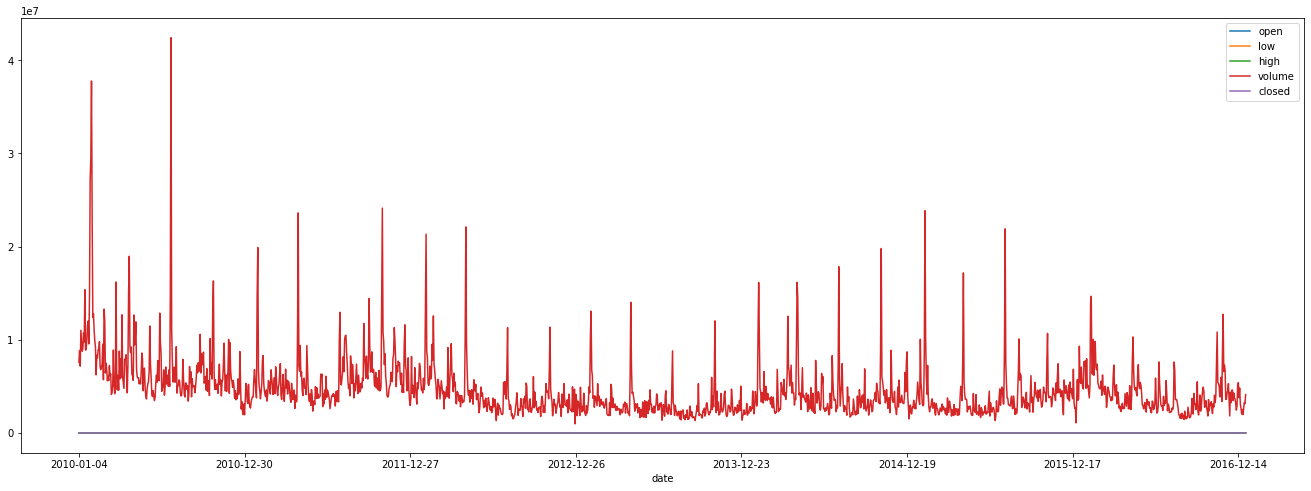

In [148]:
data.plot(figsize=(23,8))       #Display data of AMZN

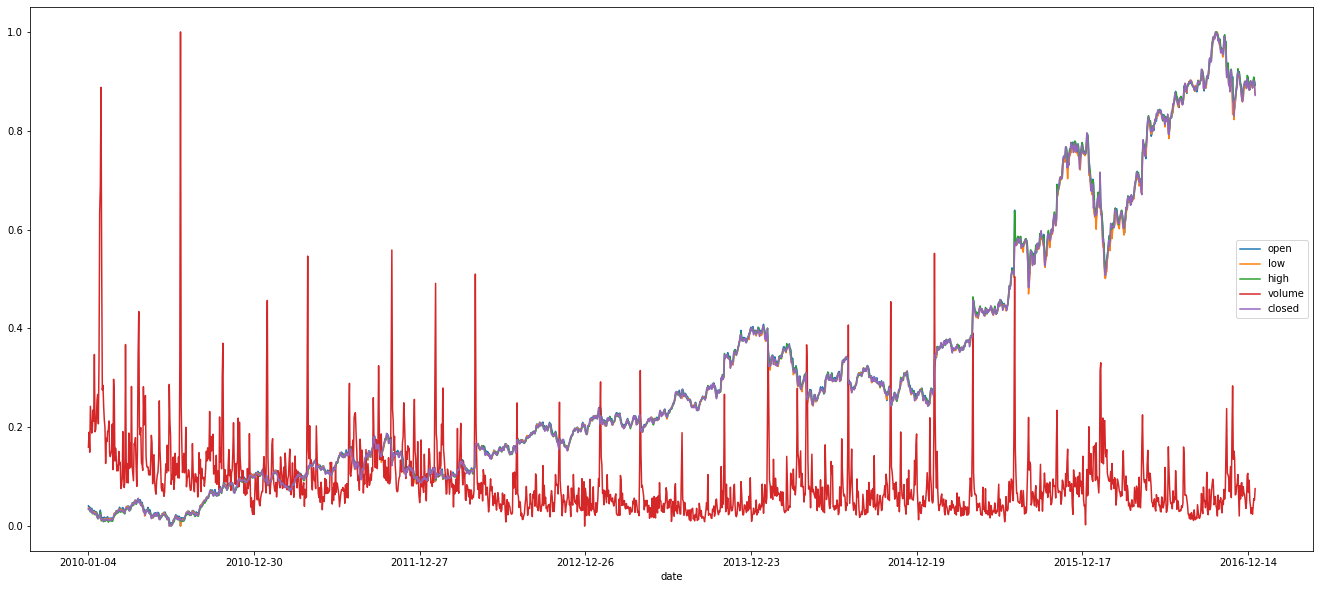

In [149]:
# Function to normalize values (All the values are between -1 and 1)
def normalize_values(data_set):
    min_max_scaler = preprocessing.MinMaxScaler()
    data_set['open'] = min_max_scaler.fit_transform(data_set.open.values.reshape(-1,1))
    data_set['high'] = min_max_scaler.fit_transform(data_set.high.values.reshape(-1,1))
    data_set['low'] = min_max_scaler.fit_transform(data_set.low.values.reshape(-1,1))
    data_set['volume'] = min_max_scaler.fit_transform(data_set.volume.values.reshape(-1,1))
    data_set['closed'] = min_max_scaler.fit_transform(data_set['closed'].values.reshape(-1,1))
    return data_set
data = normalize_values(data)

data.plot(figsize=(23,10)) #View Data after Normalizing